In [3]:
# import libraries
# Always run this cell first!
import numpy as np
import pandas as pd
import math

import scipy
import statsmodels.api # appear to need to import the api as well as the library itself for the interpreter to find the modules
import statsmodels as sm

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.offline
plotly.offline.init_notebook_mode(connected=True) # make plotly work with Jupyter Notebook using CDN


Matplotlib is building the font cache; this may take a moment.


In [4]:
# an extra function for plotting a straight line
def plot_abline(slope, intercept, color = None, x_name = "x", y_name = "y"):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(
        x_vals, y_vals, '--', color = color,
        label = f"${y_name} = {slope:.2f}{x_name} " + ("-" if intercept < 0 else "+") + f"{abs(intercept):.2f}$"
    )

In [6]:
wbl = pd.read_excel('WLR.xlsx', index_col = 'country_code')
wbl.head()

,country,year,adult_literacy_rate_(pct),primary_school_completion_rate_(pct),primary_school_enrollment_rate_(pct)
country_code,,,,,
ALB,Albania,2021,98.449997,98.155830,95.921783
ARE,United Arab Emirates,2019,95.526482,111.938820,114.412361
ARG,Argentina,2018,99.003868,98.706253,109.659172
ARM,Armenia,2020,99.788612,93.165291,91.235443
AZE,Azerbaijan,2019,99.795982,100.383339,97.935349


In [8]:
wbl['adult_literacy_rate_(pct)'].describe()

count    89.000000
mean     85.170694
std      18.214867
min      26.760000
25%      76.570518
50%      94.971130
75%      98.419998
max      99.999947
Name: adult_literacy_rate_(pct), dtype: float64

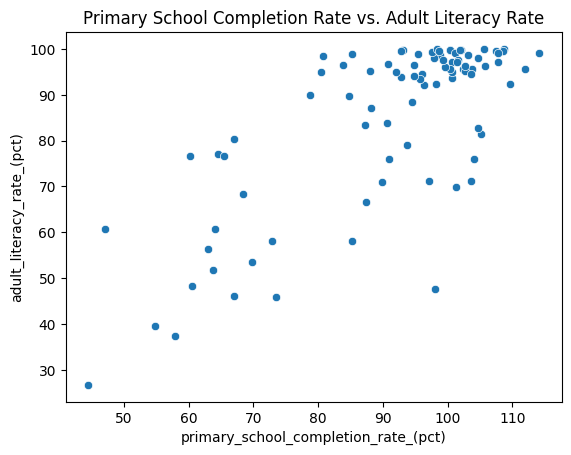

In [7]:
ax = sns.scatterplot(
    data = wbl,
    x = 'primary_school_completion_rate_(pct)',
    y = 'adult_literacy_rate_(pct)'
)
ax.set_title("Primary School Completion Rate vs. Adult Literacy Rate");

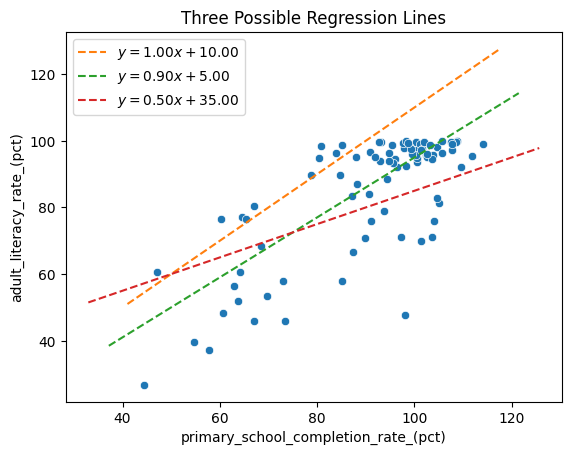

In [9]:
# Make your own line by changing around these numbers:

# add scatter plot of data
palette = iter(sns.color_palette())
sns.scatterplot(
    data = wbl,
    x = 'primary_school_completion_rate_(pct)',
    y = 'adult_literacy_rate_(pct)',
    color = next(palette)
)

# plot the lines with given slope and intercept
# use function defined in first cell
plot_abline(1, 10, color = next(palette))
plot_abline(.9, 5.0, color = next(palette))
plot_abline(.5, 35, color = next(palette))
plt.title("Three Possible Regression Lines")
plt.legend();

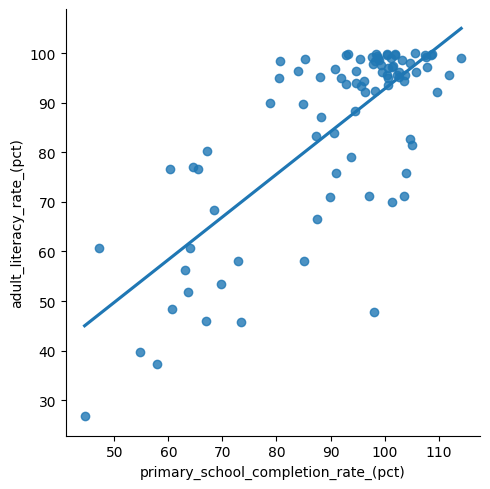

In [10]:
sns.lmplot(
    data = wbl,
    x = 'primary_school_completion_rate_(pct)',
    y = 'adult_literacy_rate_(pct)',
    ci = None
);

In [12]:
x = 'primary_school_completion_rate_(pct)'
y = 'adult_literacy_rate_(pct)'

lin_mod = sm.regression.linear_model.OLS(
    wbl[y], # the dependent variable (y)
    sm.tools.tools.add_constant(wbl[x]) # the independent variable (x)
)

results = lin_mod.fit()
print(results.summary())

                                OLS Regression Results                               
Dep. Variable:     adult_literacy_rate_(pct)   R-squared:                       0.567
Model:                                   OLS   Adj. R-squared:                  0.562
Method:                        Least Squares   F-statistic:                     114.0
Date:                       Fri, 19 Jul 2024   Prob (F-statistic):           1.70e-17
Time:                               20:24:54   Log-Likelihood:                -346.82
No. Observations:                         89   AIC:                             697.6
Df Residuals:                             87   BIC:                             702.6
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------